In [14]:

from pandas import read_pickle, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = read_pickle("data/data_all_features.pkl")

In [8]:
X_train = data.get("X_train")
y_train = data.get("y_train")
X_test = data.get("X_test")
feature_names = data.get("feature_names")
categorical = data.get("categorical")
numerical = data.get("numerical")
id_numeration_train = data.get("id_numeration_train")
id_numeration_test = data.get("id_numeration_test")

In [9]:
def get_visitor_dataframe(X_train, y_train):
    visitor_dataframe = DataFrame(columns=feature_names, data=X_train)
    visitor_dataframe["totals_transaction_revenue"] = y_train
    return visitor_dataframe

def remove_non_paying_visitors(visitor_dataframe):
    visits_with_positive_revenue = visitor_dataframe[visitor_dataframe["totals_transaction_revenue"] > 0]
    visits_without_revenue = visitor_dataframe[visitor_dataframe["totals_transaction_revenue"] == 0]
    return visits_with_positive_revenue, visits_without_revenue

In [10]:
visitor_dataframe = get_visitor_dataframe(X_train, y_train)
paying_visitor_dataframe, non_paying_visitor_dataframe = remove_non_paying_visitors(visitor_dataframe)

In [11]:

def feature_visit_number(paying_visitor_dataframe, non_paying_visitor_dataframe):
    pay_visit_number = np.array(paying_visitor_dataframe["visitNumber"])
    non_pay_visit_number = np.array(non_paying_visitor_dataframe["visitNumber"])
    
    return {
        "pay": {
            "average": np.average(pay_visit_number),
            "variance": np.var(pay_visit_number)
        },
        "non_pay": {
            "average": np.average(non_pay_visit_number),
            "variance": np.var(non_pay_visit_number)
        }
    }
    
def feature_total_bounces(pay, non_pay):
    pay_total_bounces = np.array(pay["totals_bounces"])
    non_pay_total_bounces = np.array(non_pay["totals_bounces"])
    
    return {
        "pay": {
            "average": np.average(pay_total_bounces),
            "variance": np.var(pay_total_bounces)
        },
        "non_pay": {
            "average": np.average(non_pay_total_bounces),
            "variance": np.var(non_pay_total_bounces)
        }
    }

def get_feature_stats(pay, non_pay, feature_name):
    pay_feature = np.array(pay[feature_name])
    non_pay_feature = np.array(non_pay[feature_name])
    
    feature_stats = {
        "feature_name": feature_name,
        "pay": {
            "average": np.average(pay_feature)
        },
        "non_pay": {
            "average": np.average(non_pay_feature)
        }
    }
    print(feature_stats)
    
    return feature_stats
    
def get_base_dataframe(pay, non_pay):
    feature_names = [
        "visitNumber",
        "totals_bounces",
        "totals_newVisits",
        "totals_hits",
        "totals_pageviews",
        "trafficSource_adwordsClickInfo.page",
        "trafficSource_isTrueDirect",
        "device_isMobile"
    ]
    return pay[feature_names], non_pay[feature_names]

def get_channel_grouping_dataframe(pay, non_pay):
    feature_names = [
        "channelGrouping_Affiliates",
        "channelGrouping_Direct",
        "channelGrouping_Display",
        "channelGrouping_Organic Search",
        "channelGrouping_Paid Search",
        "channelGrouping_Referral",
        "channelGrouping_Social"
    ]
    
    return pay[feature_names], non_pay[feature_names]
        
    
def get_device_cateogry_feature_stats(pay, non_pay):
    print("deivce_categories")
    feature_names = [
        "device_deviceCategory_desktop",
        "device_deviceCategory_mobile",
        "device_deviceCategory_tablet"
    ]
    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)
        
def get_geo_network_continent_feature_stats(pay, non_pay):
    print("geo network continents")
    feature_names = [
        "geoNetwork_continent_Americas",
        "geoNetwork_continent_Asia",
        "geoNetwork_continent_Europe"
    ]
    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)
        
def get_geo_network_sub_continent_feature_stats(pay, non_pay):
    print("geo sub continent")
    feature_names = [
        "geoNetwork_subContinent_Caribbean",
        "geoNetwork_subContinent_Central America",
        "geoNetwork_subContinent_Eastern Asia",
        "geoNetwork_subContinent_Northern America",
        "geoNetwork_subContinent_Northern Europe",
        "geoNetwork_subContinent_South America",
        "geoNetwork_subContinent_Western Asia"
    ]
    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)

def get_traffic_source_medium_feature_stats(pay, non_pay):
    print("trafficSource_medium")
    feature_names = [
        "trafficSource_medium_cpm",
        "trafficSource_medium_organic",
        "trafficSource_medium_referral",
        "trafficSource_adwordsClickInfo.adNetworkType_@",
        "trafficSource_adwordsClickInfo.slot_Top"
    ]
    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)

def get_device_browser_feature_stats(pay, non_pay):
    print("device_browser")
    feature_names = [
        "device_browser_Safari",
        "device_browser_Firefox",
        "device_browser_Internet Explorer",
        "device_browser_Edge",
        "device_browser_Chrome"
    ]
    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)
        
def get_device_operatingSystem_feature_stats(pay, non_pay):
    print("device_operatingSystem")
    feature_names = [
        "device_operatingSystem_Linux",
        "device_operatingSystem_iOS",
        "device_operatingSystem_Windows",
        "device_operatingSystem_Android",
        "device_operatingSystem_Macintosh",
        "device_operatingSystem_Chrome OS",
    ]
    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)
        
def get_geo_network_city_feature_stats(pay, non_pay):
    print("city")
    feature_names = [
        "geoNetwork_city_San Francisco",
        "geoNetwork_city_Sunnyvale",
        "geoNetwork_city_Houston",
        "geoNetwork_city_San Bruno",
        "geoNetwork_city_San Jose",
        "geoNetwork_city_Washington",
        "geoNetwork_city_New York",
        "geoNetwork_city_Austin",
        "geoNetwork_city_Atlanta",
        "geoNetwork_city_Seattle",
        "geoNetwork_city_Kirkland",
        "geoNetwork_city_Chicago",
        "geoNetwork_city_Toronto",
        "geoNetwork_city_Ann Arbor",
        "geoNetwork_city_Mountain View",
        "geoNetwork_city_Los Angeles",
        "geoNetwork_city_Salem",
        "geoNetwork_city_Cambridge",
        "geoNetwork_city_Santa Clara",
        "geoNetwork_metro_Seattle-Tacoma WA",
        "geoNetwork_metro_Los Angeles CA",
        "geoNetwork_metro_Chicago IL",
        "geoNetwork_metro_New York NY",
        "geoNetwork_metro_San Francisco-Oakland-San Jose CA",
        "geoNetwork_country_Canada",
        "geoNetwork_country_Brazil",
        "geoNetwork_country_United States",
        "geoNetwork_country_Venezuela",
        "geoNetwork_networkDomain_rr.com",
        "geoNetwork_networkDomain_cox.net",
        "geoNetwork_networkDomain_comcastbusiness.net",
        "geoNetwork_networkDomain_comcast.net",
        "geoNetwork_networkDomain_verizon.net",
        "geoNetwork_networkDomain_sbcglobal.net",
        "geoNetwork_region_Georgia",
        "geoNetwork_region_Washington",
        "geoNetwork_region_New York",
        "geoNetwork_region_District of Columbia",
        "geoNetwork_region_Texas",
        "geoNetwork_region_California",
        "geoNetwork_region_Massachusetts",
        "geoNetwork_region_Illinois",
        "geoNetwork_region_Michigan"
    ]
    
    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)

def get_traffic_source_feature_stats(pay, non_pay):
    print("traffic source")
    feature_names = [
        "trafficSource_adContent_Google Merchandise Collection",
        "trafficSource_campaign_AW - Accessories",
        "trafficSource_campaign_AW - Dynamic Search Ads Whole Site",
        "trafficSource_keyword_1hZbAqLCbjwfgOH7",
        "trafficSource_keyword_6qEhsCssdK0z36ri",
        "trafficSource_keyword_(Remarketing/Content targeting)",
        "trafficSource_keyword_Google Merchandise",
        "trafficSource_keyword_google merchandise store",
        "trafficSource_source_sites.google.com",
        "trafficSource_source_mail.google.com",
        "trafficSource_source_t.co",
        "trafficSource_source_groups.google.com",
        "trafficSource_source_bing",
        "trafficSource_source_l.facebook.com",
        "trafficSource_source_dealspotr.com",
        "trafficSource_source_youtube.com",
        "trafficSource_source_mall.googleplex.com",
        "trafficSource_source_yahoo",
        "trafficSource_source_dfa",
        "trafficSource_source_analytics.google.com",
        "trafficSource_source_(direct)",
        "trafficSource_source_google",
        "trafficSource_referralPath_/offer/2145",
        "trafficSource_referralPath_/google-merchandise-store",
        "trafficSource_referralPath_/mail/u/0/",
        "trafficSource_referralPath_/yt/about/tr/",
        "trafficSource_referralPath_/a/google.com/forum/",
        "trafficSource_referralPath_/yt/about/pt-BR/",
        "trafficSource_referralPath_/yt/about/es-419/",
        "trafficSource_referralPath_/yt/about/",
        "trafficSource_referralPath_/analytics/web/"
    ]

    for feature_name in feature_names:
        feature_stats = get_feature_stats(pay, non_pay, feature_name)
        
    pay[feature_names].head()


In [12]:
pay_base_dataframe, non_pay_base_dataframe = get_base_dataframe(paying_visitor_dataframe, non_paying_visitor_dataframe)

In [13]:
pay_base_dataframe

,visitNumber,totals_bounces,totals_newVisits,totals_hits,totals_pageviews,trafficSource_adwordsClickInfo.page,trafficSource_isTrueDirect,device_isMobile
751,1.0,0.0,1.0,11.0,11.0,0.0,1.0,0.0
752,3.0,0.0,0.0,11.0,10.0,0.0,1.0,0.0
798,7.0,0.0,0.0,13.0,11.0,0.0,1.0,0.0
801,6.0,0.0,0.0,13.0,12.0,0.0,1.0,0.0
857,4.0,0.0,0.0,17.0,14.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
902405,10.0,0.0,0.0,61.0,48.0,0.0,1.0,0.0
902408,2.0,0.0,0.0,66.0,30.0,0.0,1.0,0.0
902417,1.0,0.0,1.0,122.0,90.0,0.0,0.0,0.0
902418,3.0,0.0,0.0,130.0,90.0,0.0,1.0,0.0


In [33]:
def plot_barchart_averages(data, labels, label_name, title):
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel(label_name)
    plt.title(title)
    plt.show()


def plot_barchart_average_column(pay_base_dataframe, non_pay_base_dataframe, column_name):
    pay = pay_base_dataframe[column_name] 
    avg_pay = np.average(pay.values)

    non_pay = non_pay_base_dataframe[column_name] 
    avg_non_pay = np.average(non_pay.values)

    data = [avg_pay, avg_non_pay]
    labels = ["Pay", "Non Pay"]
    label_name = "Average"
    title = column_name

    plot_barchart_averages(data, labels, label_name, title)

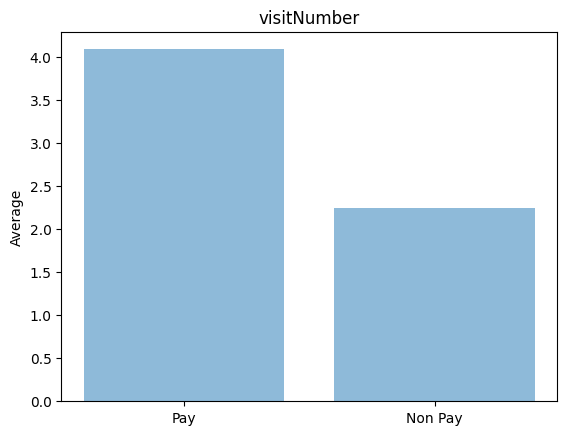

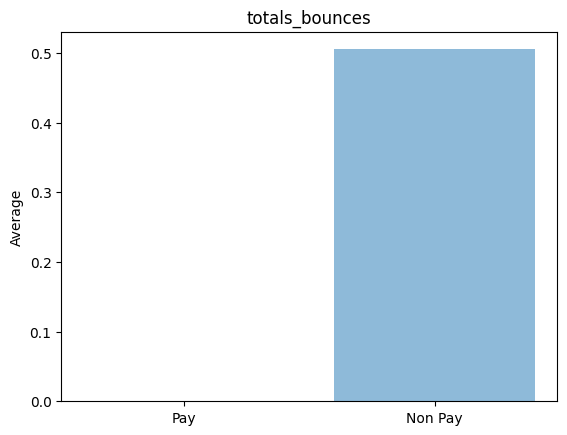

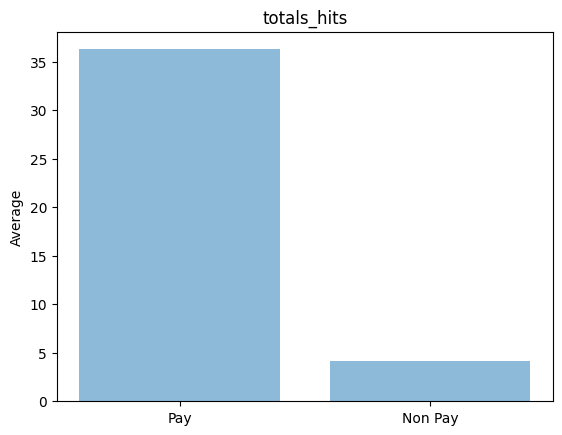

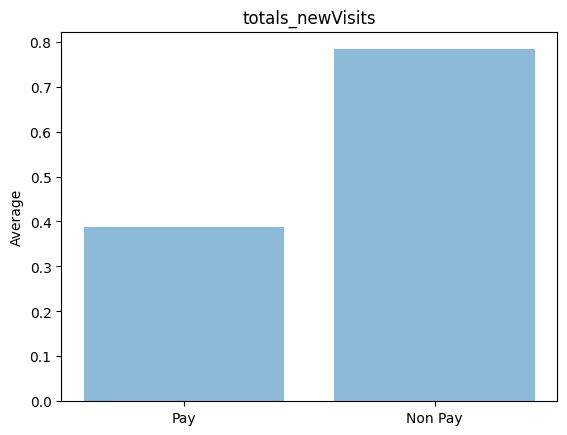

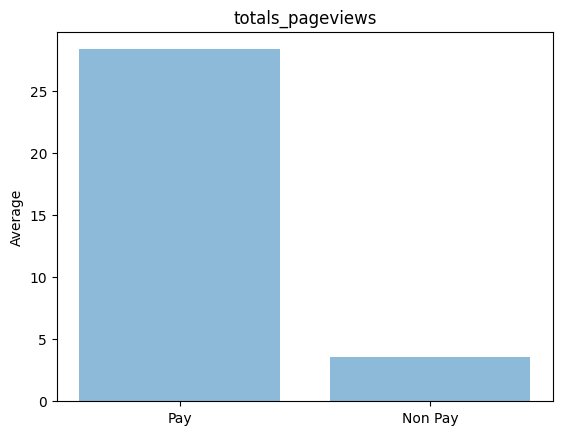

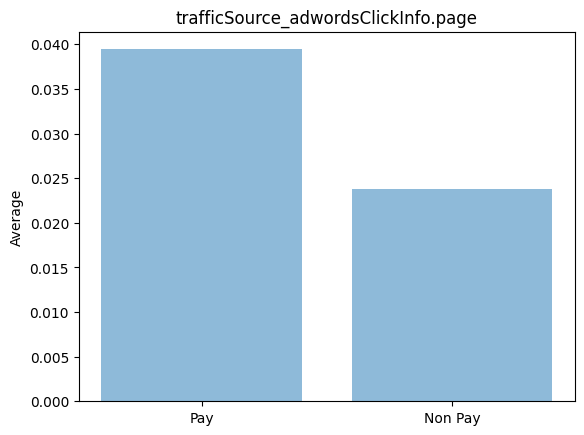

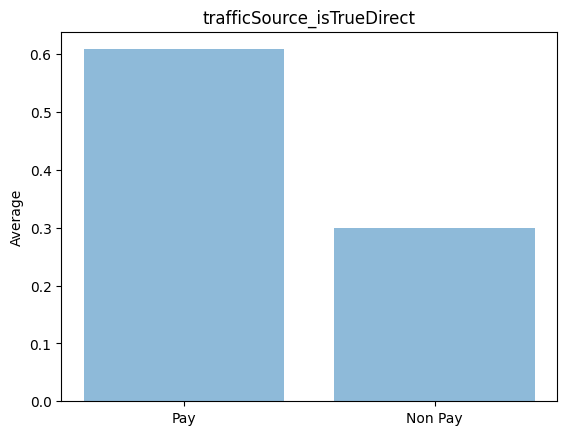

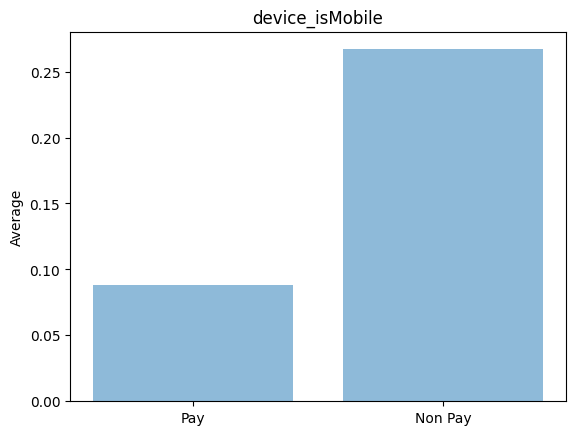

In [34]:
column_names = [
    'visitNumber',
    'totals_bounces',
    'totals_hits',
    'totals_newVisits',
    'totals_pageviews',
    'trafficSource_adwordsClickInfo.page',
    'trafficSource_isTrueDirect',
    'device_isMobile'
]
for column_name in column_names:
    plot_barchart_average_column(pay_base_dataframe, non_pay_base_dataframe, column_name)

In [46]:
def plot_grouped_bar_chart(
    paying_visitor_dataframe, 
    non_paying_visitor_dataframe,
    column_names,
    part_to_strip,
    title
):
    pay_avg = []
    non_pay_avg = []
    for column_name in column_names:
        pay_avg.append(np.average(paying_visitor_dataframe[column_name].values))
        non_pay_avg.append(np.average(non_paying_visitor_dataframe[column_name].values))

    x = np.arange(len(column_names))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(25,5))
    rects1 = ax.bar(x - width/2, pay_avg, width, label='Pay')
    rects2 = ax.bar(x + width/2, non_pay_avg, width, label='Non Pay')

    labels = [s.replace(part_to_strip, '') for s in column_names]
    ax.set_ylabel('Average')
    ax.set_title('Title')
    ax.set_xticks(x, column_names)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    # fig.tight_layout()

    plt.show()

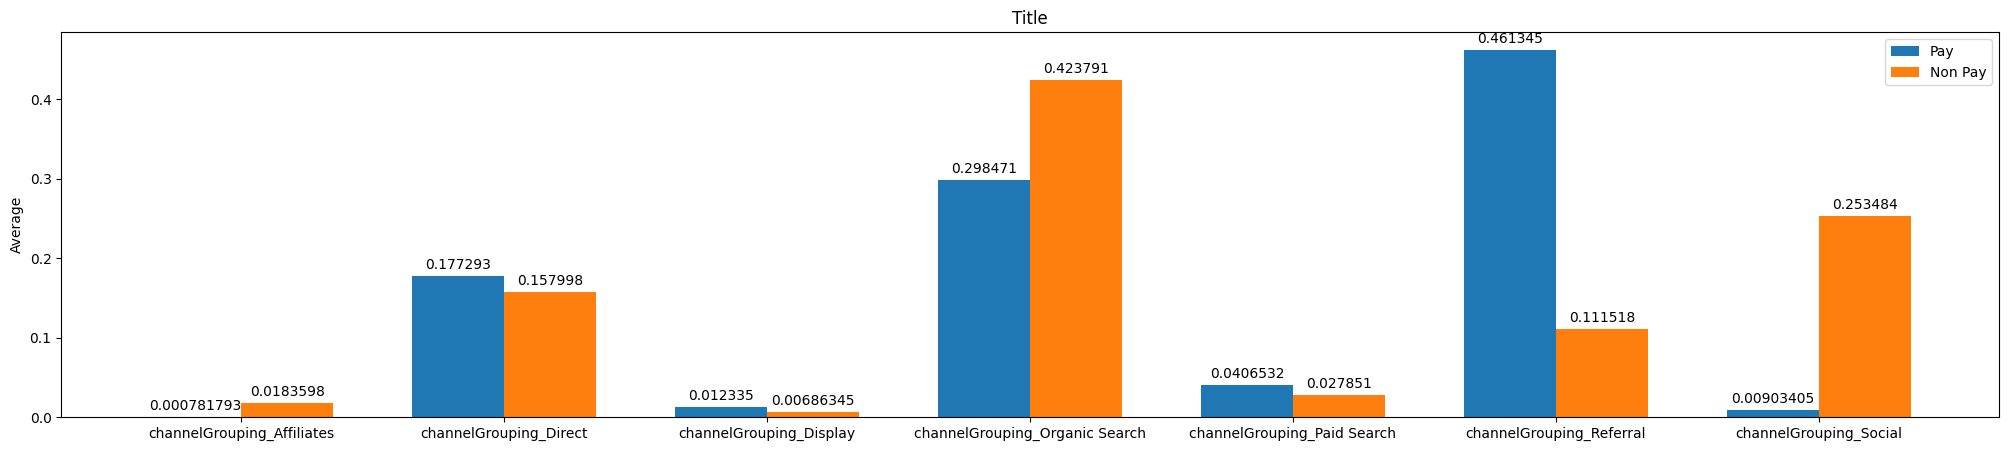

In [47]:
channel_grouping_column_names = [
        "channelGrouping_Affiliates",
        "channelGrouping_Direct",
        "channelGrouping_Display",
        "channelGrouping_Organic Search",
        "channelGrouping_Paid Search",
        "channelGrouping_Referral",
        "channelGrouping_Social"
    ]
title = "Channel Grouping"
plot_grouped_bar_chart(paying_visitor_dataframe, non_paying_visitor_dataframe, channel_grouping_column_names, title)

In [42]:
get_geo_network_city_feature_stats(paying_visitor_dataframe, non_paying_visitor_dataframe)


city
{'feature_name': 'geoNetwork_city_San Francisco', 'pay': {'average': 0.06323835997220292}, 'non_pay': {'average': 0.021961462810928107}}
{'feature_name': 'geoNetwork_city_Sunnyvale', 'pay': {'average': 0.039523974982626824}, 'non_pay': {'average': 0.014149900756583782}}
{'feature_name': 'geoNetwork_city_Houston', 'pay': {'average': 0.004864489228630994}, 'non_pay': {'average': 0.002710820730148792}}
{'feature_name': 'geoNetwork_city_San Bruno', 'pay': {'average': 0.008947185545517721}, 'non_pay': {'average': 0.0017761710330403717}}
{'feature_name': 'geoNetwork_city_San Jose', 'pay': {'average': 0.017546907574704656}, 'non_pay': {'average': 0.011293216328206785}}
{'feature_name': 'geoNetwork_city_Washington', 'pay': {'average': 0.008512856150104239}, 'non_pay': {'average': 0.0027298952137632497}}
{'feature_name': 'geoNetwork_city_New York', 'pay': {'average': 0.13082001389854064}, 'non_pay': {'average': 0.027890261129680682}}
{'feature_name': 'geoNetwork_city_Austin', 'pay': {'aver

In [44]:
get_traffic_source_feature_stats(paying_visitor_dataframe, non_paying_visitor_dataframe)

traffic source
{'feature_name': 'trafficSource_adContent_Google Merchandise Collection', 'pay': {'average': 0.010163307852675468}, 'non_pay': {'average': 0.005604532097306795}}
{'feature_name': 'trafficSource_campaign_AW - Accessories', 'pay': {'average': 0.011292564280750522}, 'non_pay': {'average': 0.007773413087115411}}
{'feature_name': 'trafficSource_campaign_AW - Dynamic Search Ads Whole Site', 'pay': {'average': 0.02805767894371091}, 'non_pay': {'average': 0.01559619542593883}}
{'feature_name': 'trafficSource_keyword_1hZbAqLCbjwfgOH7', 'pay': {'average': 0.004864489228630994}, 'non_pay': {'average': 0.0024729506991920274}}
{'feature_name': 'trafficSource_keyword_6qEhsCssdK0z36ri', 'pay': {'average': 0.022671994440583737}, 'non_pay': {'average': 0.012594769327781537}}
{'feature_name': 'trafficSource_keyword_(Remarketing/Content targeting)', 'pay': {'average': 0.0007817929117442669}, 'non_pay': {'average': 0.0025649570319205874}}
{'feature_name': 'trafficSource_keyword_Google Merch